Aviation Data

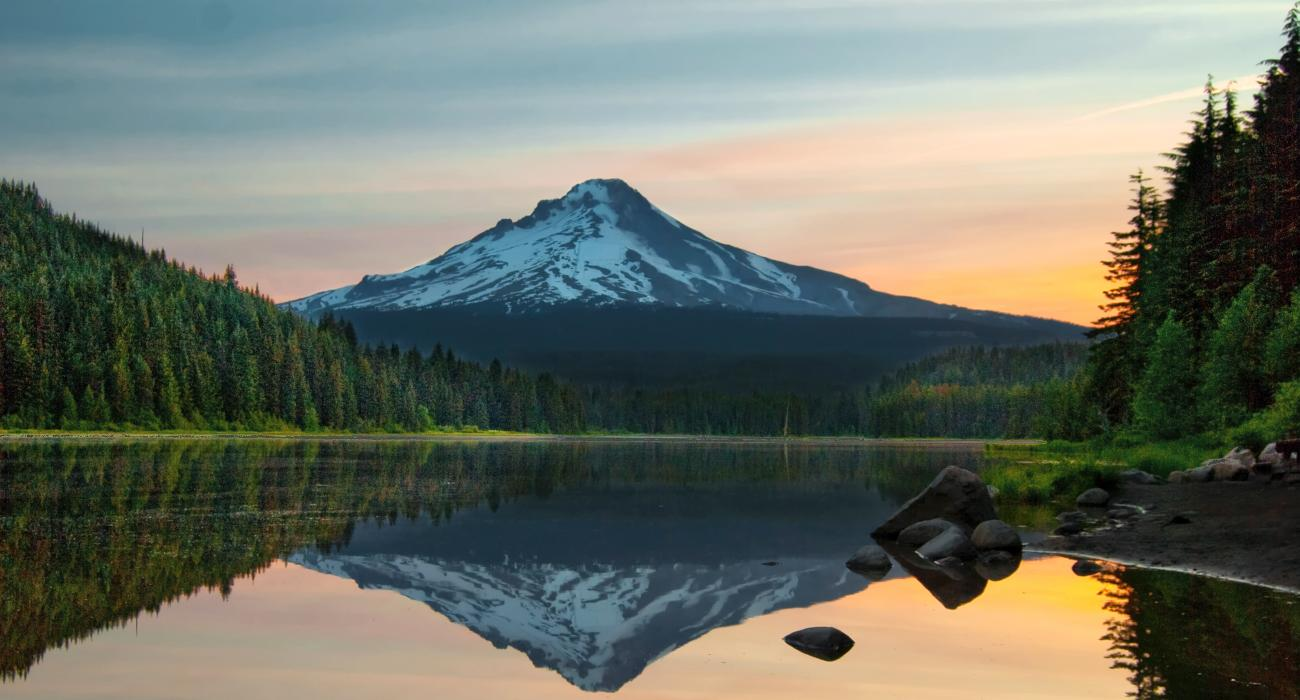

In [1]:
# Objective 1: Look for aircraft that is lowest risk in terms of investment
# Objective 2: Give 3 business recommendations
# Objective 3: Visualizations

In [115]:
# Import libraries
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [116]:
df = pd.read_csv('data/Aviation_Data.csv')

/Users/jacobserfaty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


GOT RID OF IRRELEVANT COLUMNS

In [117]:
df.shape

(90348, 31)

In [119]:
new_cols = ['Country', 'Injury.Severity', 'Aircraft.damage', 
            'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines',
            'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
            'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 
            'Report.Status', 'Event.Date', 'Latitude', 'Longitude', 'Airport.Name']

In [120]:
df = df[new_cols]

In [122]:
df.columns

Index(['Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Event.Date', 'Latitude',
       'Longitude', 'Airport.Name'],
      dtype='object')

CLEANING EACH COLUMN

In [124]:
df.loc[~df['Injury.Severity'].isin(['Non-Fatal', 'nan', 'Minor', 'Serious', 'Incident', 'Unavailable']), 
'Injury.Severity'] = 'Fatal'

In [125]:
df['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', 'Minor',
       'Serious'], dtype=object)

In [126]:
df['Make'] = df['Make'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)

In [127]:
df['Make'].value_counts()

Cessna                         27149
Piper                          14870
Beech                           5372
Boeing                          2745
Bell                            2722
                               ...  
Sadler terry a                     1
Moses tim c                        1
Arrow falcon exporters inc.        1
Silliman                           1
Dg flugzeugbau                     1
Name: Make, Length: 7587, dtype: int64

In [128]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Executive/corporate", "Business")
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Other Work Use", "Business")

In [129]:
df.loc[~df['Purpose.of.flight'].isin(['Personal', 'Business']), 
'Purpose.of.flight'] = 'Other'

In [130]:
df = df[df['Purpose.of.flight'] != 'Other']

In [131]:
df['Purpose.of.flight'].unique()

array(['Personal', 'Business'], dtype=object)

In [132]:
df['Country'] = df['Country'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)
df['Country'] = df['Country'].str.replace("United states", "United States")
df['Country'] = df['Country'].str.replace("United kingdom", "United Kingdom")
df['Country'] = df['Country'].str.replace("South africa", "South Africa")

In [133]:
df = df[df['Country'] != 'Un']

In [134]:
df['Country'].unique()

array(['United States', nan, 'Gulf of mexico', 'Puerto rico',
       'Atlantic ocean', 'Bahamas', 'Missing', 'High island',
       'Korea, republic of', 'Netherlands antilles', 'Iceland',
       'Pacific ocean', 'Caribbean sea', 'Mexico', 'Canada',
       'Philippines', 'San juan islands', 'Australia', 'El salvador',
       'West indies', 'British virgin islands', 'Mozambique', 'Panama',
       'Turks and caicos islands', 'Dominican republic', 'Congo',
       'Belize', 'St vincent and the grenadines', 'Jamaica', 'Costa rica',
       'Montserrat', 'Venezuela', 'Japan', 'Germany', 'Argentina',
       'Kenya', 'Ecuador', 'France', 'French guiana', 'Denmark', 'Spain',
       'United Kingdom', 'Guatemala', 'Federated states of micronesia',
       'Central african republic', 'Nicaragua', 'Marshall islands',
       'Northern mariana islands', 'Switzerland', 'Austria', 'Haiti',
       'Cuba', 'Cayman islands', 'Greece', 'Sweden', 'Peru', 'Mauritius',
       'Netherlands', 'Ethiopia', 'Bolivia'

In [135]:
df['Number.of.Engines'] = df['Number.of.Engines'].apply(lambda x: float(x))

In [136]:
df['Number.of.Engines'].value_counts()

1.0    47777
2.0     4838
0.0      847
4.0       25
3.0       21
8.0        2
Name: Number.of.Engines, dtype: int64

In [137]:
df['Weather.Condition'] = df['Weather.Condition'].str.replace("Unk", "UNK")

In [138]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [139]:
df.loc[~df['Report.Status'].isin(['Probable Cause', 'Foreign']), 
'Report.Status'] = 'Other'

In [140]:
df['Report.Status'].unique()

array(['Probable Cause', 'Other', 'Foreign'], dtype=object)

In [141]:
df['Airport.Name'].apply(lambda x: str(x).lower().capitalize())

0           Nan
1           Nan
2           Nan
3           Nan
4           Nan
          ...  
90340       Nan
90343       Nan
90345    Payson
90346       Nan
90347       Nan
Name: Airport.Name, Length: 55281, dtype: object

In [142]:
df['Aircraft.damage'] = df['Aircraft.damage'].map(lambda x: str(x))

In [143]:
df = df[df['Aircraft.Category'] == 'Airplane']

In [144]:
df.isna().sum()

Country                       4
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Make                          5
Model                        13
Amateur.Built                 4
Number.of.Engines           557
Engine.Type                1476
Purpose.of.flight             0
Total.Fatal.Injuries       2051
Total.Serious.Injuries     2058
Total.Minor.Injuries       1773
Total.Uninjured             543
Weather.Condition           413
Broad.phase.of.flight     12953
Report.Status                 0
Event.Date                    0
Latitude                   2304
Longitude                  2312
Airport.Name               4938
dtype: int64

CLEANING THE COLUMN NAMES

In [145]:
new_column_names = {
    'Injury.Severity': 'Injury Severity',
    'Aircraft.damage': 'Aircraft Damage',
    'Aircraft.Category': 'Aircraft Category',
    'Amateur.Built': 'Amateur Built',
    'Number.of.Engines': 'Engines Count',
    'Purpose.of.flight': 'Purpose of Flight',
    'Total.Fatal.Injuries': 'Total Fatal Injuries',
    'Total.Serious.Injuries': 'Total Serious Injuries',
    'Total.Minor.Injuries': 'Total Minor Injuries',
    'Total.Uninjured': 'Total Uninjured',
    'Weather.Condition': 'Weather Condition',
    'Broad.phase.of.flight': 'Broad Flight Phase',
    'Report.Status': 'Report Status',
    'Engine.Type': 'Engine Type',
    'Event.Date': 'Event Date',
    'Airport.Name': 'Airport Name'
}

In [146]:
df.rename(columns=new_column_names, inplace=True)

GROUPBYS

In [151]:
df.groupby('Aircraft Damage').sum()

,Engines Count,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
Aircraft Damage,,,,,
Destroyed,2284.0,3349.0,378.0,459.0,409.0
Minor,245.0,5.0,8.0,19.0,504.0
Substantial,15484.0,2569.0,3393.0,2851.0,17460.0
Unknown,37.0,9.0,7.0,11.0,40.0
nan,89.0,23.0,21.0,15.0,371.0


SEPARATING PLANES BY PASSENGER CAPACITY

In [39]:
# Sample dataframe
# df = pd.DataFrame(...)

# Step 1: Filter out the required columns
df_filtered = df[['Make', 'Engines Count', 'Injury Severity']]

# Drop rows with missing 'Engines Count' values
df_filtered = df_filtered.dropna(subset=['Engines Count'])

# Step 2: Keep rows that have a 'Make' value in the top 20 most common 'Make' values
top_20_makes = df_filtered['Make'].value_counts().head(40).index
df_filtered = df_filtered[df_filtered['Make'].isin(top_20_makes)]

# Step 3: One-hot encode the 'Make' column
df_encoded = pd.get_dummies(df_filtered, columns=['Make'])

# Step 4: Convert the 'Injury Severity' column to binary
df_encoded['Injury Severity'] = df_encoded['Injury Severity'].apply(lambda x: 1 if x == 'Fatal' else 0)

# Ensure the DataFrame has integer type columns
df_encoded = df_encoded.astype(int)

# The final dataframe is df_encoded
df_encoded



,Engines Count,Injury Severity,Make_Aero commander,Make_Aeronca,Make_American champion aircraft,Make_Aviat,Make_Aviat aircraft inc,Make_Beech,Make_Bellanca,Make_Boeing,...,Make_Rans,Make_Raytheon aircraft company,Make_Rockwell,Make_Ryan,Make_Socata,Make_Stinson,Make_Taylorcraft,Make_Vans,Make_Waco,Make_Zenith
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90320,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90332,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90336,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Assuming df_encoded is already created as per our previous discussions

# Sum the injury severity for each make based on one-hot encoded columns
make_columns = [col for col in df_encoded.columns if 'Make_' in col]

# Proportion calculation for each 'Make'
proportions = {}
for make_col in make_columns:
    total_for_make = df_encoded[make_col].sum()
    fatal_for_make = (df_encoded[df_encoded['Injury Severity'] == 1][make_col]).sum()
    proportions[make_col] = fatal_for_make / total_for_make if total_for_make != 0 else 0

# Sorting makes by proportions
sorted_proportions = dict(sorted(proportions.items(), key=lambda item: item[1], reverse=True))

print(sorted_proportions)


{'Make_Socata': 0.45454545454545453, 'Make_Lancair': 0.3333333333333333, 'Make_Cirrus design corp': 0.3253012048192771, 'Make_Vans': 0.30526315789473685, 'Make_North american': 0.27586206896551724, 'Make_Mooney': 0.2696629213483146, 'Make_Rockwell': 0.2692307692307692, 'Make_Grumman': 0.26229508196721313, 'Make_Zenith': 0.25806451612903225, 'Make_Beech': 0.2578397212543554, 'Make_Cirrus': 0.25675675675675674, 'Make_Raytheon aircraft company': 0.2553191489361702, 'Make_Grumman american': 0.25, 'Make_Rans': 0.2222222222222222, 'Make_Diamond aircraft ind inc': 0.21428571428571427, 'Make_Mooney aircraft corp.': 0.2, 'Make_Quicksilver': 0.19444444444444445, 'Make_Aero commander': 0.19148936170212766, 'Make_Piper': 0.1817895400126024, 'Make_American champion aircraft': 0.175, 'Make_Navion': 0.17391304347826086, 'Make_Grumman american avn. corp.': 0.16279069767441862, 'Make_Bellanca': 0.15384615384615385, 'Make_Cessna': 0.14783956597558612, 'Make_Ercoupe': 0.14545454545454545, 'Make_Ryan': 0.

In [41]:
#for each make in the top 20 makes, we want the average number of the sum of the four columns that give us the total number of passengers

In [42]:
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']

# Find the top 20 makes
top_20_makes = df['Make'].value_counts().nlargest(20).index

# Filter the dataframe to only have the top 20 makes
df_top_20 = df[df['Make'].isin(top_20_makes)]

# Group by 'Make' and get the mean of the 'Total.Passengers'
avg_passengers_per_make = df_top_20.groupby('Make')['Total Passengers'].mean().reset_index()

print(avg_passengers_per_make)

                  Make  Total Passengers
0              Aeronca          1.509434
1                Aviat          1.342857
2   Aviat aircraft inc          1.461538
3                Beech          2.193989
4             Bellanca          1.513369
5               Boeing          1.810526
6               Cessna          1.992468
7             Champion          1.563025
8               Cirrus          1.987952
9   Cirrus design corp          1.994012
10             Ercoupe          1.464286
11             Grumman          2.090909
12            Luscombe          1.401639
13               Maule          1.688235
14              Mooney          1.837061
15      North american          1.811111
16               Piper          1.953759
17             Stinson          1.794872
18         Taylorcraft          1.493506
19                Vans          1.490566


In [43]:
# Assuming you already have df and df_encoded loaded

# 1. Extract top 20 'Makes'
top_40_makes = df['Make'].value_counts().head(40).index

# Filter the df to keep only these top 20 makes
df_top_makes = df[df['Make'].isin(top_40_makes)]

# Compute the average sum across the specified columns for each 'Make'
columns_to_sum = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']
df_top_makes['Total Passengers'] = df_top_makes[columns_to_sum].sum(axis=1)
average_passengers = df_top_makes.groupby('Make')['Total Passengers'].mean()

# Fatality rates from df_encoded
make_columns = [col for col in df_encoded.columns if 'Make_' in col]

proportions = {}
for make_col in make_columns:
    total_for_make = df_encoded[make_col].sum()
    fatal_for_make = (df_encoded[df_encoded['Injury Severity'] == 1][make_col]).sum()
    proportions[make_col.replace('Make_', '')] = fatal_for_make / total_for_make if total_for_make != 0 else 0

# Convert the proportions dictionary to a DataFrame
df_proportions = pd.DataFrame(list(proportions.items()), columns=['Make', 'Average Fatality Rate']).set_index('Make')

# Merge both data
result = pd.merge(average_passengers, df_proportions, left_index=True, right_index=True)

print(result)


                             Total Passengers  Average Fatality Rate
Make                                                                
Aero commander                       2.020000               0.191489
Aeronca                              1.489247               0.131148
American champion aircraft           1.463415               0.175000
Aviat                                1.327869               0.065574
Aviat aircraft inc                   1.461538               0.046875
Beech                                2.178250               0.257840
Bellanca                             1.493392               0.153846
Boeing                               1.837838               0.046729
Cessna                               1.984636               0.147840
Champion                             1.553191               0.113636
Cirrus                               2.000000               0.256757
Cirrus design corp                   2.000000               0.325301
Dehavilland                       

<ipython-input-43-0ce2a89b8be7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_makes['Total Passengers'] = df_top_makes[columns_to_sum].sum(axis=1)


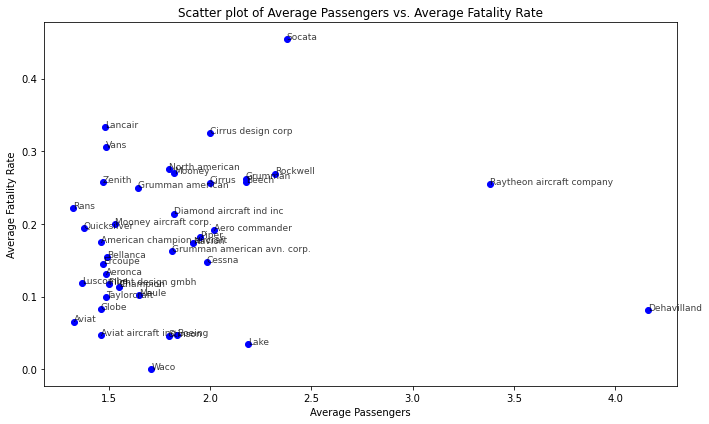

In [44]:
import matplotlib.pyplot as plt

# Assuming you have already created the 'result' DataFrame from the previous steps

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result['Total Passengers'], result['Average Fatality Rate'], color='blue')
plt.title('Scatter plot of Average Passengers vs. Average Fatality Rate')
plt.xlabel('Average Passengers')
plt.ylabel('Average Fatality Rate')

# Label each point with the 'Make' for clarity
for make, row in result.iterrows():
    plt.annotate(make, (row['Total Passengers'], row['Average Fatality Rate']), fontsize=9, alpha=0.75)

plt.tight_layout()
plt.show()


In [56]:
df_cessna = df[df['Make'] == 'Cessna']
df_piper = df[df['Make'] == 'Piper']
df_beech = df[df['Make'] == 'Beech']
df_boeing = df[df['Make'] == 'Boeing']
df_mooney = df[df['Make'] == 'Mooney']

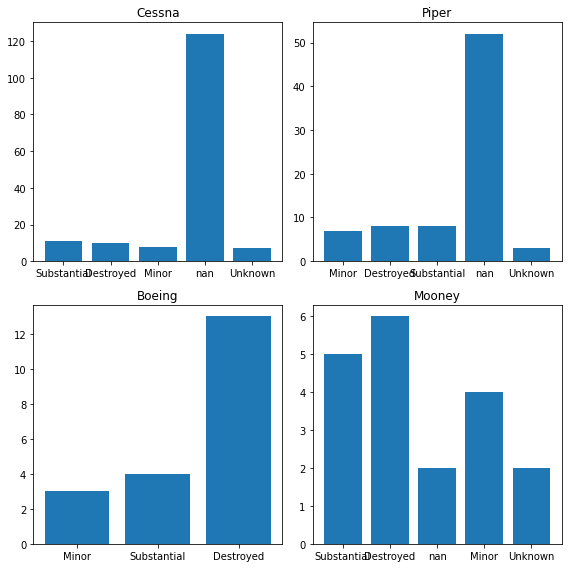

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

ax1.bar(df_cessna['Aircraft Damage'], df_cessna['Total Passengers'])
ax1.set_title('Cessna')

ax2.bar(df_piper['Aircraft Damage'], df_piper['Total Passengers'])
ax2.set_title('Piper')

ax3.bar(df_boeing['Aircraft Damage'], df_boeing['Total Passengers'])
ax3.set_title('Boeing')

ax4.bar(df_mooney['Aircraft Damage'], df_mooney['Total Passengers'])
ax4.set_title('Mooney')

plt.tight_layout()
plt.show()

In [47]:
# Create a new dataset that takes the 'Aircraft Damage' category and converts them into numeric values

In [ ]:
cessna_destroyed = dict(df['Model'].loc[(df['Make'] == 'Cessna') & (df['Aircraft Damage'] == 'Destroyed')].value_counts().head(20))
cessna_minor = dict(df['Model'].loc[(df['Make'] == 'Cessna') & (df['Aircraft Damage'] == 'Minor')].value_counts().head(20))
cessna_substantial = dict(df['Model'].loc[(df['Make'] == 'Cessna') & (df['Aircraft Damage'] == 'Substantial')].value_counts().head(20))

In [76]:
cessna_destroyed

{'172': 45,
 '182': 34,
 '172N': 26,
 '150': 25,
 '152': 20,
 '172M': 17,
 'T210M': 14,
 '340A': 11,
 '210': 10,
 '177': 10,
 '150L': 9,
 '172P': 9,
 '180': 8,
 '421': 8,
 '182Q': 8,
 '414': 8,
 '172S': 7,
 '170B': 7,
 '172K': 7,
 'R182': 7}

In [92]:
df_cessna = pd.DataFrame(list(cessna_destroyed.items()), columns=['Model', 'Destroyed Count']).set_index('Model').reset_index()
df_cessna['Substantial Count'] = [x[1] for x in cessna_substantial]
df_cessna['Minor Count'] = [x[1] for x in cessna_minor]
df_cessna

,Model,Destroyed Count,Substantial Count,Minor Count
0,172,45,7,5
1,182,34,8,0
2,172N,26,8,6
3,150,25,7,8
4,152,20,5,8
5,172M,17,5,1
6,T210M,14,7,2
7,340A,11,4,7
8,210,10,7,2
9,177,10,7,4


In [89]:
destroyed = dict(df['Model'].loc[(df['Aircraft Damage'] == 'Destroyed')].value_counts().head(40))
substantial = dict(df['Model'].loc[(df['Aircraft Damage'] == 'Substantial')].value_counts().head(40))
minor = dict(df['Model'].loc[(df['Aircraft Damage'] == 'Minor')].value_counts().head(40))

In [93]:
substantial

{'172': 403,
 '180': 204,
 '182': 195,
 '172N': 162,
 'PA-18-150': 160,
 'SR22': 157,
 '152': 138,
 'A36': 136,
 'PA-28-140': 136,
 '150': 127,
 '172M': 120,
 'PA28': 117,
 '140': 107,
 '172S': 99,
 '170B': 99,
 'PA-28-180': 95,
 '7AC': 86,
 'PA-18': 85,
 'A185F': 82,
 '210': 81,
 '7GCBC': 81,
 'M20J': 74,
 '182P': 74,
 '177': 71,
 'PA-28-181': 68,
 '172P': 66,
 'PA-12': 66,
 '170': 66,
 'PA18': 64,
 '150M': 62,
 'PA-22-150': 62,
 '7ECA': 59,
 'PA-24-250': 59,
 '8A': 58,
 'PA-28-161': 56,
 'J3C-65': 54,
 '177RG': 54,
 '108': 53,
 'PA-30': 52,
 'A185': 52}

In [98]:
df_damage = pd.DataFrame(list(destroyed.items()), columns=['Model', 'Destroyed Count']).set_index('Model').reset_index()
df_damage

,Model,Destroyed Count
0,172,45
1,SR22,41
2,A36,41
3,182,34
4,PA-28-140,26
5,172N,26
6,150,25
7,PA28,25
8,152,20
9,172M,17


In [99]:
df_sub = pd.DataFrame(list(substantial.items()), columns=['Model', 'Destroyed Count']).set_index('Model').reset_index()

In [100]:
df_minor = pd.DataFrame(list(minor.items()), columns=['Model', 'Destroyed Count']).set_index('Model').reset_index()

In [114]:
df_set = df_damage.merge(df_sub, on='Model', how = 'inner')
df_new = df_set.merge(df_minor, on='Model', how = 'left')
df_new

,Model,Destroyed Count_x,Destroyed Count_y,Destroyed Count
0,172,45,403,NaN
1,SR22,41,157,5.0
2,A36,41,136,NaN
3,182,34,195,2.0
4,PA-28-140,26,136,NaN
5,172N,26,162,NaN
6,150,25,127,NaN
7,PA28,25,117,NaN
8,152,20,138,3.0
9,172M,17,120,1.0
